


## Project: Predicting Diabetes



#### Getting Started

Diabetes is a chronic disease that affects millions of people worldwide. It is caused by the body's inability to produce or use insulin effectively, resulting in high blood sugar levels.

Early detection and timely management of diabetes can prevent complications and improve quality of life for patients.

Machine learning algorithms can be used to predict the risk of developing diabetes, and in this project, we will aim to successfully predict whether a person has diabetes or not using logistic regression, decision tree, random forest classifier, and naive Bayes algorithms.

### Exploring Data

The dataset used in this project is taken from Kaggle and was originally contributed by National Institute of Diabetes and Digestive and Kidney Diseases. We would like to thank the contributors of this dataset for making it publicly available for research purposes.

Download the dataset from the following link:
https://www.kaggle.com/datasets/mathchi/diabetes-data-set



In [10]:
# Import libraries necessary for this project 
import numpy as np 
import pandas as pd 
from time import time 
from IPython.display import display 
# Allows the use of display() for DataFrames 
import matplotlib.pyplot as plt 
import sklearn
# Pretty display for notebooks
%matplotlib inline
# Load the Census dataset
data= pd.read_csv("/home/dhruba/antern_project/diabetes_prediction/diabetes.csv")
# Success Display 
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



**Feature set exploration**

1. Pregnancies: This attribute represents the number of times the person has been pregnant. It ranges from 0 to 17 pregnancies.
2. Glucose: This attribute represents the glucose level in the person's blood. Glucose levels are measured in mg/dL and range from 0 to 199 mg/dl.
3. Blood Pressure: This attribute represents the person's blood pressure measurement. Blood pressure is measured in mm Hg and consists of two numbers, the systolic and diastolic blood pressure. The systolic blood pressure ranges from 0 to 122 mm Hg, while the diastolic blood pressure ranges from 0 to 99 mm Hg.
4. SkinThickness: This attribute represents the thickness of the person's skin in mm. It is measured using a caliper and ranges from 0 to 99 mm.
5. Insulin: This attribute represents the insulin level in the person's blood. Insulin is a hormone that regulates blood sugar levels. Insulin levels are measured in U/mL and range from 0 to 846 µU/mL.
6. BMI: This attribute represents the person's body mass index, BMI is a measure of body fat based on height and weight. It is calculated as weight in kilograms divided by height in meters squared and ranges from 0 to 67.1 kg/m².
7. DiabetesPedigreeFunction: This attribute represents the person's diabetes pedigree function, which provides an estimate of the likelihood of the person developing diabetes based on family history. It is a dimensionless value and ranges from 0.078 to 2.42.
8. Age: This attribute represents the person's age in years and ranges from 21 to 81 years.
9. Outcome: This attribute represents the final result, where 1 indicates that the person has diabetes and 0 indicates that the person does not have diabetes.



In [11]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
# Pilling missing values 
# Count the number of missing values in the Skin Thickness column 
print('Number of missing values in Skin Thickness column:', (data["SkinThickness"]==0).sum())
# Count the number of missing values in the Insulin column 
print('Number of missing values in Insulin column:' , (data["Insulin"]==0).sum())


Number of missing values in Skin Thickness column: 227
Number of missing values in Insulin column: 374


In [14]:
# Replace 0 values in the Skin thickness and insulin column with the mean value of the column
data.loc[data["SkinThickness"] == 0, "SkinThickness"] = data[ "SkinThickness"].mean()
data.loc[data["Insulin"]==0, "Insulin"] = data[ "Insulin"].mean()


/tmp/ipykernel_7971/1510817402.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["SkinThickness"] == 0, "SkinThickness"] = data[ "SkinThickness"].mean()
/tmp/ipykernel_7971/1510817402.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '79.79947916666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Insulin"]==0, "Insulin"] = data[ "Insulin"].mean()


In [16]:
#Count the number of 0 values left should be 0
print((data[ "SkinThickness"] == 0).sum())
print((data["Insulin"] == 0).sum())


0
0


In [15]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [17]:
#Total number of records
n_records= len(data.index)
#Number of records where outcome = 1
n_1= data[data.Outcome == 1].shape[0]
#Number of records where outcome = 0
n_0= data[data.Outcome == 0].shape[0]
#Percentage of individuals whose Outcome is 1
n1_perc =  (n_1/n_records) * 100
#Print the results
print("Total number of records: {}".format(n_records))
print("Number of persons diagonised with diabetes: {}".format(n_1))
print("Number of persons not having diabetes: {}".format(n_0))
print("Percentage of people who are Diabetic : {}%".format(n1_perc))


Total number of records: 768
Number of persons diagonised with diabetes: 268
Number of persons not having diabetes: 500
Percentage of people who are Diabetic : 34.89583333333333%


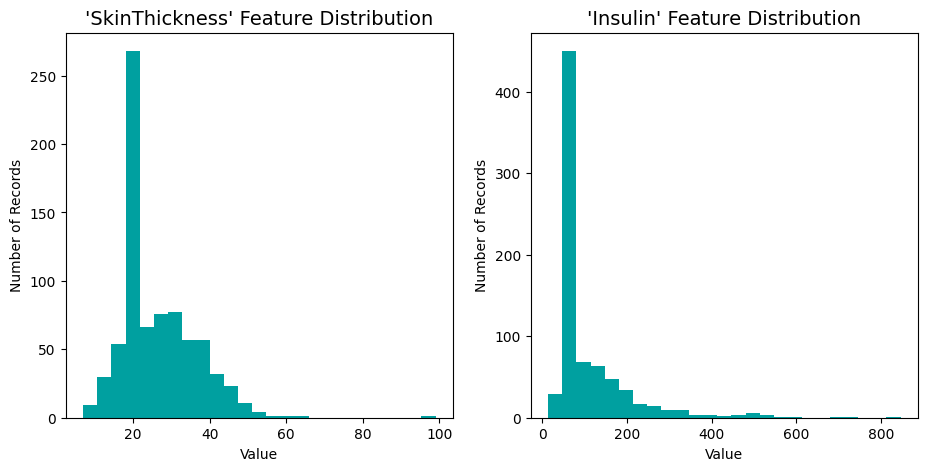

In [20]:
#Split the data into features and target label
outcome_r= data['Outcome'] #target label
features_r= data.drop('Outcome', axis= 1) #other features
#Visualize skewed continuous features of original data 
fig= plt.figure(figsize = (11,5));
#Skewed feature plotting
for i, feature in enumerate(['SkinThickness', 'Insulin']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[ feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution" %(feature), fontsize = 14) 
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")


In [22]:
def distribution (data, transformed = False):

    #Visualization code for displaying skewed distributions of features

    # Create figure
    fig = plt.figure(figsize = (11,5));
    #Skewed feature plotting
    for i, feature in enumerate(['SkinThickness', 'Insulin']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist (data[feature], bins =  25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution" % feature, fontsize=14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
    #Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", fontsize=16, y=1.03)
    else:
        fig.suptitle("Skewed Distributions", fontsize=16, y=1.03)
    fig.tight_layout()
    plt.show()


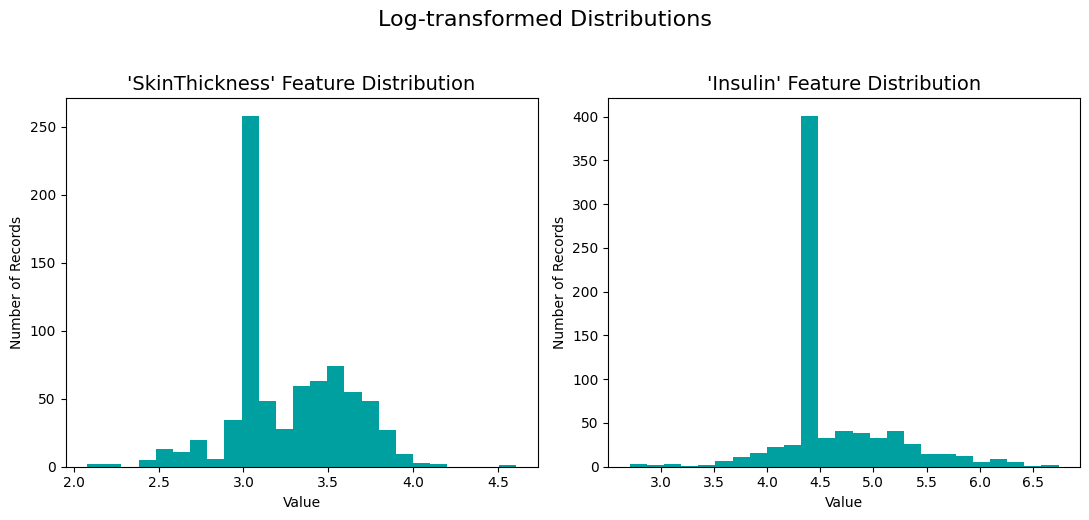

In [23]:

#log-transform the skewed features
skewed = ['SkinThickness', 'Insulin']
features_log_transformed = pd.DataFrame(data=features_r)
features_log_transformed[skewed] = features_r[skewed].apply(lambda x: np.log(x + 1))

#Visualize the new log distributions
distribution(features_log_transformed, transformed=True)


In [24]:
#Import sklearn.preprocessing. StandardScaler 
from sklearn.preprocessing import MinMaxScaler
#Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Insulin', 'SkinThickness', 'DiabetesPedigreeFunction']
features_log_minmax_transform = pd.DataFrame (data=features_r)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed [numerical])
# Show an example of a record with scaling applied
display (features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


## Training and Testing dataset

In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'outcome' data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(features_final, outcome_r, test_size=0.2, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


## Evaluating model performance
In this section we will be exploring 4 different ML algorithms:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Naive Bayes
Note: Recap of accuracy, precision, recall

**Accuracy** is a measure of how often the classifier correctly predicts the class of a data point. It's calculated as the ratio of the number of correct predictions to the total number of predictions made on the test dataset.


**Precision** is a measure of the proportion of positive predictions that are true positives. In other words, it's the ratio of the true positives to the total number of positive predictions made by the classifier.
[True Positives/(True Positives + False Positives)]

**Recall** also known as sensitivity, is a measure of the proportion of true positive instances that were correctly predicted by the classifier. It's calculated as the ratio of the true positives to the sum of the true positives and false negatives.
[True Positives/(True Positives + False Negatives)]

In [27]:
from sklearn.metrics import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    # Initialize results dictionary
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
    # Record the training time
    results['train_time'] = end - start
    
    # Get the predictions on the test set (X_test)
    # Then get predictions on the first 300 training samples (X_train) using .predict()
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    
    # Record the prediction time
    results['pred_time'] = end - start
    
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
    # Compute accuracy on the test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, pos_label=1, average='binary', beta=0.5)
    
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, pos_label=1, average='binary', beta=0.5)
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    # Return the results
    return results

In [29]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time

# Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier()
clf_C = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=42)

# Calculate the number of samples for 18, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

LogisticRegression trained on 6 samples.
LogisticRegression trained on 61 samples.
LogisticRegression trained on 614 samples.


/home/dhruba/antern_project/diabetes_prediction/diabetes_prediction/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dhruba/antern_project/diabetes_prediction/diabetes_prediction/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

RandomForestClassifier trained on 6 samples.
RandomForestClassifier trained on 61 samples.
RandomForestClassifier trained on 614 samples.
AdaBoostClassifier trained on 6 samples.
AdaBoostClassifier trained on 61 samples.
AdaBoostClassifier trained on 614 samples.


In [35]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches

def evaluate(results, accuracy, fl):
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize=(11, 7))
    
    # Constants
    bar_width = 0.3
    colors = ['#A00000', '#00A0A0', '#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                # Creative plot code
                ax[j//3, j%3].bar(i+k-bar_width, results[learner][i][metric], width=bar_width, color=colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["18", "108", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
                
                # Add unique y-labels
                if j == 0:
                    ax[j//3, j%3].set_ylabel("Time (in seconds)")
                elif j == 1:
                    ax[j//3, j%3].set_ylabel("Accuracy Score")
                else:
                    ax[j//3, j%3].set_ylabel("F-score")
                
                # Add titles
                if j == 0:
                    ax[j//3, j%3].set_title("Model Training")
                elif j == 1:
                    ax[j//3, j%3].set_title("Accuracy Score on Training Subset")
                else:
                    ax[j//3, j%3].set_title("F-score on Training Subset")
                
                # Add horizontal lines for naive predictors
                if j == 1:
                    ax[j//3, j%3].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
                elif j == 2:
                    ax[j//3, j%3].axhline(y=fl, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
                
                # Set y-limits for score panels
                ax[j//3, j%3].set_ylim((0, 1))
    
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))
    plt.legend(handles=patches, bbox_to_anchor=(-0.80, 2.53), loc='upper center', borderaxespad=0., ncol=3, fontsize='large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    plt.tight_layout()
    plt.show()

In [36]:
# Calculate accuracy, precision, and recall
accuracy = n_1 / n_records
precision = n_1 / n_records
recall = np.sum(outcome_r) / np.sum(outcome_r)

# Calculate F-score using the formula for beta = 0.5
beta = 0.5
fscore = (1 + np.square(beta)) * precision * recall / ((np.square(beta) * precision) + recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.3490, F-score: 0.4012]


/tmp/ipykernel_7971/1329958427.py:58: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


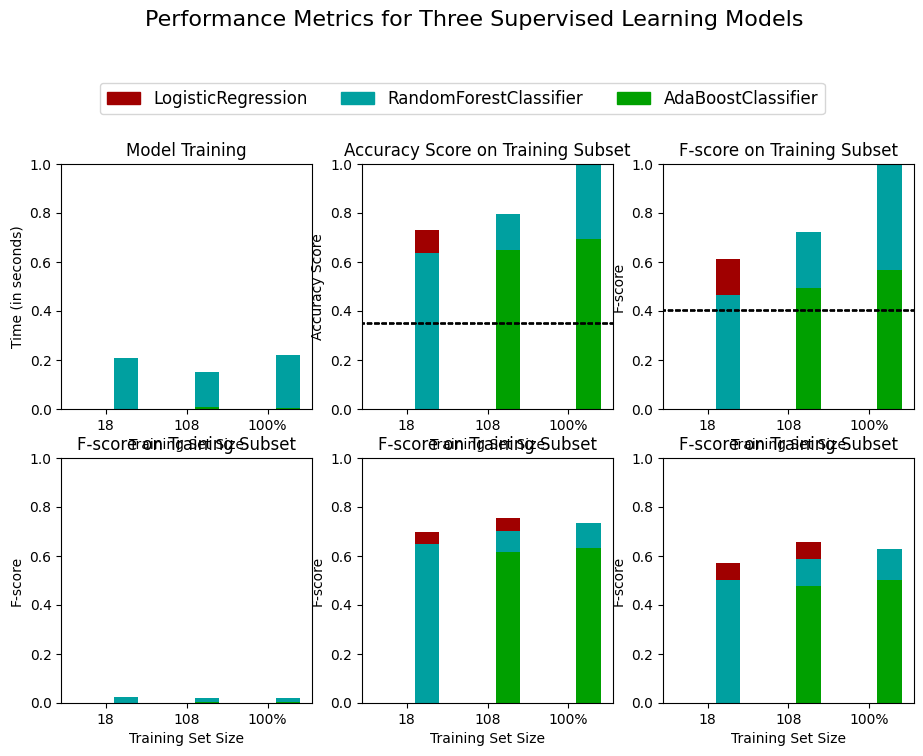

In [37]:
evaluate(results, accuracy, fscore)

## Model Tuning
Model tuning involves adjusting the hyperparameters of the machine learning model to improve its performance. It is a critical step in the machine learning pipeline that can significantly impact the accuracy and efficiency of the model.

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)
parameters = {'n_estimators': [5, 10, 15, 20, 25], 'max_depth': [2, 4, 6, 8, 10]}

# Creating the fbeta score and accuracy_score scoring objects
scorer = make_scorer(fbeta_score, beta=0.5)
acc_scorer = make_scorer(accuracy_score)

# Perform grid search on classifier using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator for classifier
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized classifiers
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Print the results
print("Random Forest")
print("Unoptimized model accuracy: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Optimized model accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Unoptimized model F-score: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5)))
print("Optimized model F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

Random Forest
Unoptimized model accuracy: 0.7468
Optimized model accuracy: 0.7792
Unoptimized model F-score: 0.6452
Optimized model F-score: 0.6909


## Feature Importance
In supervised learning, identifying the features
are working with. By narrowing our focus to a
the underlying patterns and relationships in the
that have the strongest predictive power is a critical task when analyzing datasets such as the census data we small set of key features that are most closely related to the target label, we can simplify our understanding of data. For this project, our goal is to accurately identify individuals who have diabetes.

In [39]:
def feature_plot(importances, X_train, y_train):
    # Display the three most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:3]]
    values = importances[indices][:3]
    
    # Create the plot
    fig = plt.figure(figsize=(5, 5))
    plt.title("Normalized Weights for First Three Most Predictive Features", fontsize=16)
    plt.bar(np.arange(3), values, width=0.6, align="center", color='#00A000', label="Feature Weight")
    plt.bar(np.arange(3), np.cumsum(values), width=0.2, align="center", color='#00A0A0', label="Cumulative Feature Weight")
    plt.xticks(np.arange(3), columns)
    plt.xlim((-0.5, 2.5))
    plt.ylabel("Weight", fontsize=12)
    plt.xlabel("Feature", fontsize=12)
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

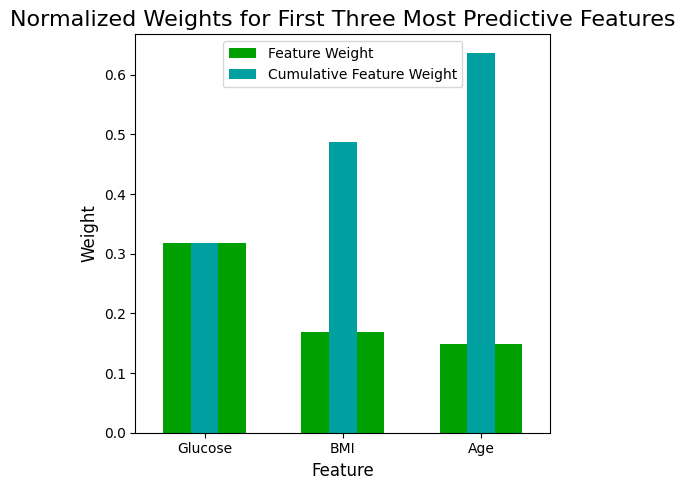

In [41]:
#Extracting important features
#Import a supervised learning model that has 'feature_importances_
from sklearn.ensemble import RandomForestClassifier
#Train the supervised model on the training set using .fit(x_train, y_train) 
model = best_clf
#Extract the feature importances using .feature importanges 
importances =  model.feature_importances_
#Plot
feature_plot(importances, X_train, y_train)

## Feature Selection
Using a subset of the available features in the data can significantly reduce the training and prediction time of a model, but it may also affect the model's performance. By analyzing the feature importance, we can identify the top contributing features and focus on using them for training the model.

In [43]:
# Import functionality for cloning a model 
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[3]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[3]]]

# Reshape the reduced feature space
X_train_reduced = X_train_reduced.values.reshape(-1, 1)
X_test_reduced = X_test_reduced.values.reshape(-1, 1)

# Train on the "best" model found from grid search earlier 
clf_reduced = clone(best_clf).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf_reduced.predict(X_test_reduced)

# Report scores from the final model using both versions of data 
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta=0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.7792
F-score on testing data: 0.6909

Final Model trained on reduced data
------
Accuracy on testing data: 0.6299
F-score on testing data: 0.3150
